<a href="https://colab.research.google.com/github/salarbalou/Fredholm-Integral-of-Second-Kind/blob/main/Project_1_2nd_Try_SalarBalou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import scipy.interpolate as sci
import matplotlib.pyplot as plt
import scipy.linalg as sla

def FIE2_Nystrom (k, f, l, a, b):
 n = 1000
 h, xl, yl, xnew = (b-a)/(n-1) , np.linspace(a, b, n) , np.linspace(a, b, n), np.linspace(a, b, 1000000)
 fi = np.array([f(x) for x in xl]); kij = np.reshape(np.array([k(x, y) for x in xl for y in yl]), ((n, n)))
 K = np.zeros((n, n)); K = - l * (h) * kij
 for i in range(n):
   K[i, i] = 1 - l * (h/2) * kij[i, i]
 K[1:, 0] = - l * (h/2) * kij[1:, 0] ; K[0:-1, -1] = - l * (h/2) * kij[0:-1:, -1]
 sol = sla.solve(l * K, fi)
 I = sci.interp1d(xl, sol, kind = 'cubic')
 If = lambda xn: np.array([I(xn)])
 er = np.abs(np.average(sol) - np.average(If(xnew)))
 plt.plot(xl, sol, '-')
 plt.rcParams["figure.figsize"] = (10, 8)
 plt.xlabel('x', size = 20); plt.ylabel('ψ(x)', size = 20); plt.xticks(fontsize = 16); plt.yticks(fontsize = 16), plt.locator_params(axis='x', nbins=20)
 plt.legend([f'Error =  {er}'], fontsize = 15)
 plt.title(f'FIE2 Nystrom', size = 20, fontsize = 20)
 return(plt.plot(xl, sol) and er)

In [83]:
a, b = 0, 1
l = 1
f = lambda x: np.sin(x)
k = lambda x, y: 1- (x* np.cos(x*y))

3.903956851125656e-07

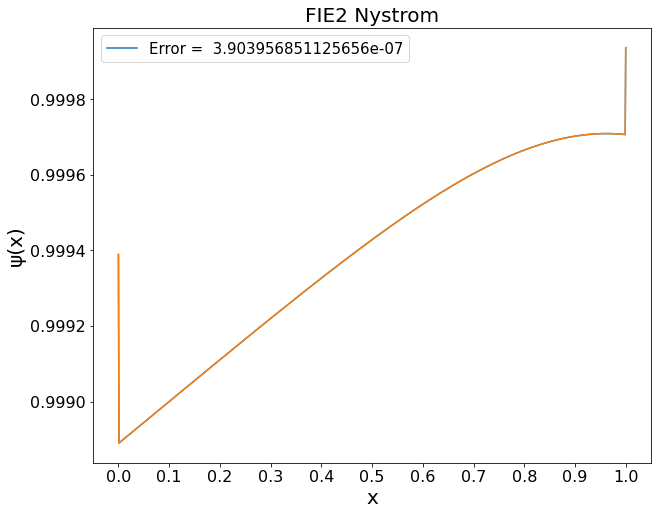

In [84]:
FIE2_Nystrom(k, f, l, a, b)